### Basic Keras ###

The core data structure of Keras is a model, a way to organize layers. 
The simplest type of model is the Sequential model, a linear stack of layers.

#### Here we'll use Keras sequential model to recognize handwritten digit from MNIST database ####

In [4]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import RMSprop

In [5]:
type(mnist)

module

In [6]:
# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 26s 2us/step


In [7]:
x_train.shape # Dataset of 60,000 28x28 grayscale images of the 10 digits

(60000, 28, 28)

In [22]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [8]:
x_test.shape # test set of 10,000 images

(10000, 28, 28)

In [9]:
y_train.shape

(60000,)

In [11]:
y_train[0]

5

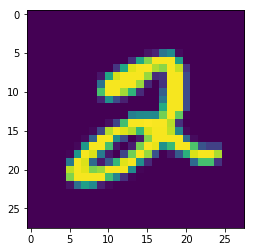

In [15]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.imshow(x_train[5]) #check random image

In [16]:
# Here are the basic information of the model
# m_train = 60000
# m_train = 10000
# We'll flatten input X to flatten it
# Each input - 28 x 28 = 784 input features; nx = 784
# We'll scale X by dividing by 256

# y - currently has int data 0-9
# these needs to be converted to categorical values

# We'll have sequential model
# Now we'll have a Dense layer - with 256 units in that layer
# Then a Dropout layer - to prevent overfitting 
# Then another Dense layer - with 128 units in this layer
# Then a Dropout layer 
# Then a Dense layer - 10 units - for softmax classification

In [23]:
x_train = x_train.reshape((60000,784))
x_test = x_test.reshape((10000,784))
x_train = x_train/256
x_test = x_test/256

In [24]:
x_train.shape

(60000, 784)

In [25]:
x_train[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [28]:
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

In [29]:
y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

### Define the model ###

In [17]:
model = Sequential()

num_class = 10

model.add( Dense(256, input_shape=(784,), activation='relu') )
model.add( Dropout(rate=0.2) )
model.add( Dense(128, activation='relu') )
model.add( Dropout(rate=0.2) )
model.add( Dense(num_class,activation='softmax') )

model.summary()

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 256)               200960    
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 128)               32896     
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 10)                1290      
Total params: 235,146
Trainable params: 235,146
Non-trainable params: 0
_________________________________________________________________


In [19]:
model.compile(optimizer='RMSprop', loss='categorical_crossentropy', metrics=['accuracy'])

In [21]:
## for above
# https://keras.io/optimizers/
# https://keras.io/losses/

### Train the model ###

In [31]:
history = model.fit(x=x_train, y=y_train, batch_size=256, epochs=20, validation_data = (x_test,y_test))

Instructions for updating:
Use tf.cast instead.
Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 10s 160us/step - loss: 0.3677 - acc: 0.8911 - val_loss: 0.1710 - val_acc: 0.9457
Epoch 2/20
60000/60000 [==============================] - 7s 119us/step - loss: 0.1580 - acc: 0.9531 - val_loss: 0.1078 - val_acc: 0.9655
Epoch 3/20
60000/60000 [==============================] - 6s 98us/step - loss: 0.1120 - acc: 0.9655 - val_loss: 0.0881 - val_acc: 0.9732
Epoch 4/20
60000/60000 [==============================] - 5s 89us/step - loss: 0.0891 - acc: 0.9728 - val_loss: 0.0800 - val_acc: 0.9758
Epoch 5/20
60000/60000 [==============================] - 7s 119us/step - loss: 0.0747 - acc: 0.9772 - val_loss: 0.0715 - val_acc: 0.9783
Epoch 6/20
60000/60000 [==============================] - 6s 93us/step - loss: 0.0661 - acc: 0.9796 - val_loss: 0.0778 - val_acc: 0.9750
Epoch 7/20
60000/60000 [==============================] - 6s 95us/step - los

In [32]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.08138560987974275
Test accuracy: 0.9824


In [33]:
### This is created with help of documentation at keras.io 